In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

In [39]:
X,y=make_classification(n_features=2,n_samples=1000,n_clusters_per_class=2,n_classes=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

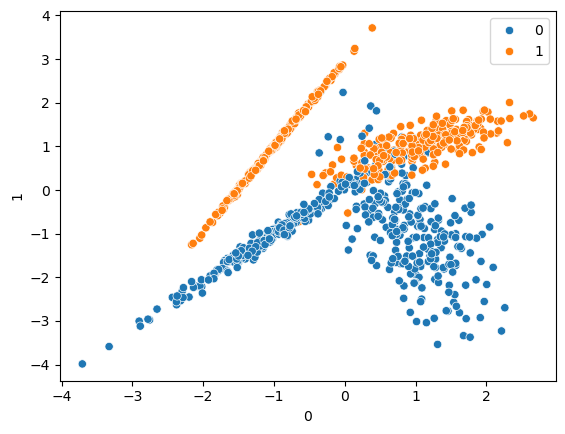

In [40]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [43]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [44]:
svc.coef_

array([[-0.83279579,  2.36695733]])

In [45]:
y_pred=svc.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       129
           1       0.87      0.94      0.90       121

    accuracy                           0.90       250
   macro avg       0.91      0.91      0.90       250
weighted avg       0.91      0.90      0.90       250

[[112  17]
 [  7 114]]


In [53]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       129
           1       0.89      0.97      0.93       121

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[115  14]
 [  4 117]]


In [54]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       129
           1       0.95      0.78      0.85       121

    accuracy                           0.87       250
   macro avg       0.89      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250

[[124   5]
 [ 27  94]]


In [55]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       129
           1       0.76      0.79      0.77       121

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250

[[99 30]
 [26 95]]


## Hyperparameter Tuning with svc

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']
            }

In [58]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [60]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       129
           1       0.89      0.96      0.92       121

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[114  15]
 [  5 116]]
